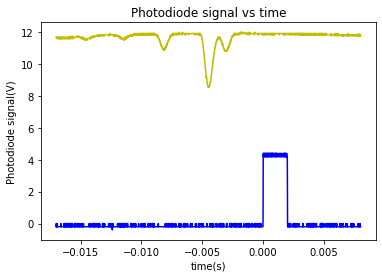

[[ 2.26819301e-04 -9.61193798e-14  8.26860217e-08]
 [-9.61193798e-14  9.04285255e-11 -5.25521205e-17]
 [ 8.26860217e-08 -5.25521205e-17  9.04285251e-11]]
[1.50605213e-02 9.50939144e-06 9.50939141e-06]

 fit 1 is:  0.00022681930144703447 
 fit 2 is:  9.042852554777218e-11 
 fit 3 is:  9.042852506797392e-11

 sigma 1 is:  0.015060521287360358 
 sigma 2 is:  9.509391439402007e-06 
 sigma 3 is:  9.509391414174406e-06
[[ 1.42002874e-04 -1.82211994e-14  4.34176347e-08]
 [-1.82211994e-14  3.98250602e-11 -8.34259810e-18]
 [ 4.34176347e-08 -8.34259810e-18  3.98250608e-11]]
[1.19164959e-02 6.31070996e-06 6.31071000e-06]

 fit 1 is:  0.00014200287401700657 
 fit 2 is:  3.982506022004426e-11 
 fit 3 is:  3.982506076516911e-11

 sigma 1 is:  0.01191649587827758 
 sigma 2 is:  6.3107099616480755e-06 
 sigma 3 is:  6.3107100048385294e-06
[[ 6.64374521e-04 -1.03845601e-09  3.86667130e-07]
 [-1.03845601e-09  6.67233960e-10 -2.07234064e-12]
 [ 3.86667130e-07 -2.07234064e-12  6.72251103e-10]]
[2.57754635

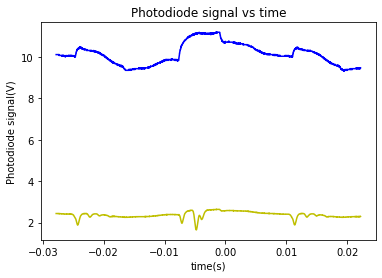

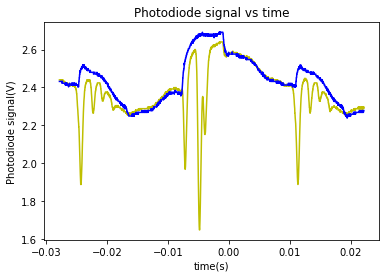

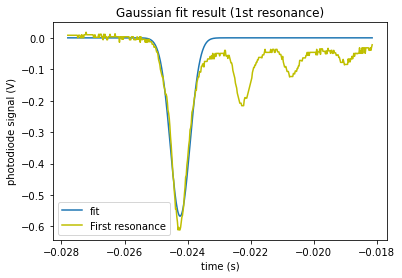

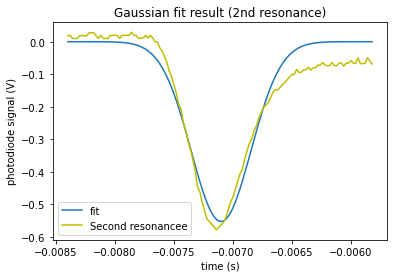

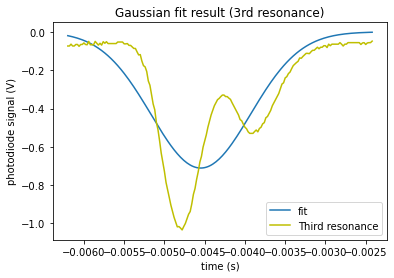

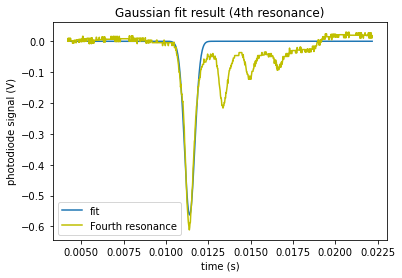

In [1]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

time=[]
photodiode_signal=[]
time1=[]
photodiode_signal1=[]

with open("RealCH1.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time.append(float(row[3]))
        # print( "time:", row[3])
        photodiode_signal.append(float(row[4]))
        # print( "photodiode signal:", row[4])

with open("RealCH2.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time1.append(float(row[3]))
        # print( "time:", row[3])
        photodiode_signal1.append(float(row[4]))
        # print( "photodiode signal:", row[4])

plot1=plt.figure(1) 
plt.plot(time,photodiode_signal,'y-')
plt.plot(time1,photodiode_signal1,'b-')
plt.xlabel('time(s)')
plt.ylabel('Photodiode signal(V)')
plt.title('Photodiode signal vs time')
plt.show()

# 2 traces
time_raw=[]
photodiode_raw=[]
time_background=[]
photodiode_background=[]

with open("real_backgroundCH1.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_raw.append(float(row[3]))
        # print( "time:", row[3])
        photodiode_raw.append(float(row[4]))
        # print( "photodiode signal:", row[4])

with open("real_backgroundCH2.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_background.append(float(row[3]))
        # print( "time:", row[3])
        photodiode_background.append(float(row[4]))
        # print( "photodiode signal:", row[4])

plot2=plt.figure(2) 
plt.plot(time_raw,photodiode_raw,'y-')
plt.plot(time_background,photodiode_background,'b-')
plt.xlabel('time(s)')
plt.ylabel('Photodiode signal(V)')
plt.title('Photodiode signal vs time')

# overlap of 2 traces
time_raw=[]
photodiode_raw=[]
time_background_scale=[]
photodiode_background_scale=[]

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_raw.append(float(row[1]))
        photodiode_raw.append(float(row[2]))

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_background_scale.append(float(row[16]))
        photodiode_background_scale.append(float(row[17]))
        
plot3=plt.figure(3) 
plt.plot(time_raw,photodiode_raw,'y-')
plt.plot(time_background_scale,photodiode_background_scale,'b-')
plt.xlabel('time(s)')
plt.ylabel('Photodiode signal(V)')
plt.title('Photodiode signal vs time')


# Part 1 
# 1st resonance
time_subtract=[]
photodiode_subtract=[]

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_subtract.append(float(row[11]))
        # print( "time:", row[11])
        photodiode_subtract.append(float(row[12]))
        # print( "photodiode signal:", row[12])
        
trim_low_index = 0
trim_high_index= 484
photodiode_subtract_trim = photodiode_subtract[trim_low_index:trim_high_index]
time_subtract_trim = time_subtract[trim_low_index:trim_high_index]

def gauss_function(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, time_subtract_trim, photodiode_subtract_trim, p0 = [-1, .4,0.1])
perr=np.sqrt(np.diag(pcov))

plot4=plt.figure(4) 
plt.plot(time_subtract_trim,gauss_function(time_subtract_trim,*popt),label='fit')
plt.plot(time_subtract_trim, photodiode_subtract_trim,'y')
plt.xlabel("time (s)")
plt.ylabel("photodiode signal (V)")
plt.title("Gaussian fit result (1st resonance)")
plt.legend(["fit","First resonance"])

print(pcov)
print(perr)

print("\n fit 1 is: ", pcov[0,0], "\n fit 2 is: ", pcov[1,1], "\n fit 3 is: ", pcov[2,2])
print("\n sigma 1 is: ", perr[0], "\n sigma 2 is: ", perr[1], "\n sigma 3 is: ", perr[2])
# The last two lines have been parsed into the uncertainties and fits.

# 2nd resonance
time_subtract1=[]
photodiode_subtract1=[]

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_subtract1.append(float(row[11]))
        # print( "time:", row[11])
        photodiode_subtract1.append(float(row[12]))
        # print( "photodiode signal:", row[12])
        
trim_low_index = 970
trim_high_index= 1100
photodiode_subtract1_trim = photodiode_subtract1[trim_low_index:trim_high_index]
time_subtract1_trim = time_subtract1[trim_low_index:trim_high_index]

def gauss_function(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt1, pcov1 = curve_fit(gauss_function, time_subtract1_trim, photodiode_subtract1_trim, p0 = [-1, .4,0.1])
perr1=np.sqrt(np.diag(pcov1))

plot5=plt.figure(5) 
plt.plot(time_subtract1_trim,gauss_function(time_subtract1_trim,*popt1),label='fit')
plt.plot(time_subtract1_trim, photodiode_subtract1_trim,'y')
plt.xlabel("time (s)")
plt.ylabel("photodiode signal (V)")
plt.title("Gaussian fit result (2nd resonance)")
plt.legend(["fit","Second resonancee"])

print(pcov1)
print(perr1)

print("\n fit 1 is: ", pcov1[0,0], "\n fit 2 is: ", pcov1[1,1], "\n fit 3 is: ", pcov1[2,2])
print("\n sigma 1 is: ", perr1[0], "\n sigma 2 is: ", perr1[1], "\n sigma 3 is: ", perr1[2])

# 3rd resonance
time_subtract2=[]
photodiode_subtract2=[]

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_subtract2.append(float(row[11]))
        # print( "time:", row[11])
        photodiode_subtract2.append(float(row[12]))
        # print( "photodiode signal:", row[12])
        
trim_low_index = 1080
trim_high_index= 1270
photodiode_subtract2_trim = photodiode_subtract2[trim_low_index:trim_high_index]
time_subtract2_trim = time_subtract2[trim_low_index:trim_high_index]

def gauss_function(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt2, pcov2 = curve_fit(gauss_function, time_subtract2_trim, photodiode_subtract2_trim, p0 = [-1, .4,0.1])
perr2=np.sqrt(np.diag(pcov2))

plot6=plt.figure(6) 
plt.plot(time_subtract2_trim,gauss_function(time_subtract2_trim,*popt2),label='fit')
plt.plot(time_subtract2_trim, photodiode_subtract2_trim,'y')
plt.xlabel("time (s)")
plt.ylabel("photodiode signal (V)")
plt.title("Gaussian fit result (3rd resonance)")
plt.legend(["fit","Third resonance"])

print(pcov2)
print(perr2)

print("\n fit 1 is: ", pcov2[0,0], "\n fit 2 is: ", pcov2[1,1], "\n fit 3 is: ", pcov2[2,2])
print("\n sigma 1 is: ", perr2[0], "\n sigma 2 is: ", perr2[1], "\n sigma 3 is: ", perr2[2])

# 4th resonance
time_subtract3=[]
photodiode_subtract3=[]

with open("subtract.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time_subtract3.append(float(row[11]))
        # print( "time:", row[11])
        photodiode_subtract3.append(float(row[12]))
        # print( "photodiode signal:", row[12])
        
trim_low_index = 1600
trim_high_index= 2500
photodiode_subtract3_trim = photodiode_subtract3[trim_low_index:trim_high_index]
time_subtract3_trim = time_subtract3[trim_low_index:trim_high_index]

def gauss_function(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt3, pcov3 = curve_fit(gauss_function, time_subtract3_trim, photodiode_subtract3_trim, p0 = [-1, .4,0.1])
perr3=np.sqrt(np.diag(pcov3))

plot7=plt.figure(7) 
plt.plot(time_subtract3_trim,gauss_function(time_subtract3_trim,*popt3),label='fit')
plt.plot(time_subtract3_trim, photodiode_subtract3_trim,'y')
plt.xlabel("time (s)")
plt.ylabel("photodiode signal (V)")
plt.title("Gaussian fit result (4th resonance)")
plt.legend(["fit","Fourth resonance"])

print(pcov3)
print(perr3)

print("\n fit 1 is: ", pcov3[0,0], "\n fit 2 is: ", pcov3[1,1], "\n fit 3 is: ", pcov3[2,2])
print("\n sigma 1 is: ", perr3[0], "\n sigma 2 is: ", perr3[1], "\n sigma 3 is: ", perr3[2])

